# Exercise 04

## Overview

1. RDKit
2. Docking

This tutorial is based on [rdkit-tutorials](https://github.com/rdkit/rdkit-tutorials/tree/master) and [LABODOCK](https://github.com/RyanZR/labodock).

## RDKit

[RDKit](https://www.rdkit.org/) is a software suite for cheminformatics, computational chemistry, and predictive modeling

A chemical curation pipeline has been developed using the open source toolkit RDKit. 

The [ChEMBL](https://www.ebi.ac.uk/chembl/) database is one of a number of public databases that contain bioactivity data on small molecule compounds curated from diverse sources. Incoming compounds are typically not standardised according to consistent rules. In order to maintain the quality of the final database and to easily compare and integrate data on the same compound from different sources it is necessary for the chemical structures in the database to be appropriately standardised. The solution: RDKit. RDKit is a open source tookit for the chemical curation pipeline.



### Basis steps with RDKit 

#### Reading and writing molecules

In [ ]:
if 'google.colab' in str(get_ipython()):
  print('Running on colab')
  !pip install rdkit

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
# uncomment this if you try the tutorial and end up with low-quality images
# IPythonConsole.ipython_useSVG=True

#### Working with SMILES

If you have a SMILES string, the easiest thing to use is MolFromSmiles:

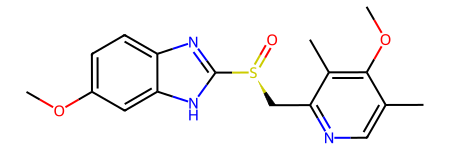

In [2]:
m = Chem.MolFromSmiles('COc1ccc2c(c1)[nH]c(n2)[S@@](=O)Cc1ncc(c(c1C)OC)C')
m

Note that the coordinates used for the drawing are not present in the molecule, the RDKit generates them when the molecule is drawn.

#### Reading Mol file data

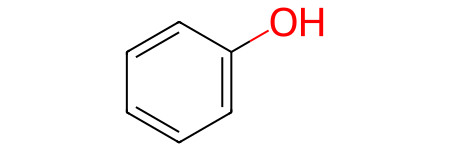

In [3]:
molblock = """phenol
  Mrv1682210081607082D          

  7  7  0  0  0  0            999 V2000
   -0.6473    1.0929    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3618    0.6804    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3618   -0.1447    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6473   -0.5572    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0671   -0.1447    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0671    0.6804    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7816    1.0929    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  2  0  0  0  0
  3  4  1  0  0  0  0
  4  5  2  0  0  0  0
  5  6  1  0  0  0  0
  1  6  2  0  0  0  0
  6  7  1  0  0  0  0
M  END
"""
m = Chem.MolFromMolBlock(molblock)
m

Here the molecule has coordinates that were read in from the Mol block. We can see this because the molecule has a conformer:

In [4]:
m.GetNumConformers()

1

The conformer that is present is 2D (we can see that from the coordinates above):

In [5]:
m.GetConformer().Is3D()

False

Here's another Mol block and the corresponding molecule:

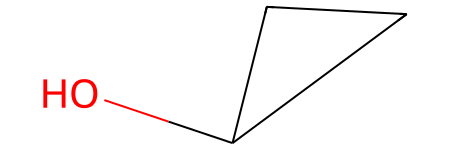

In [6]:
molblock2 ='''cyclopropanol-3D
  Mrv1682210081607153D          

 10 10  0  0  0  0            999 V2000
    0.9159    1.2233    0.2286 C   0  0  1  0  0  0  0  0  0  0  0  0
   -0.0738    1.2748   -0.9428 C   0  0  2  0  0  0  0  0  0  0  0  0
   -0.3167    0.3104    0.2232 C   0  0  2  0  0  0  0  0  0  0  0  0
   -1.3658    0.6623    1.1190 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.8730    0.7413    0.0155 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.8835    2.0739    0.9139 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.2747    0.8266   -1.8737 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7163    2.1557   -0.9817 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1264   -0.7446    0.0137 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1210    0.2486    1.9735 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  1  3  1  0  0  0  0
  3  4  1  0  0  0  0
  1  5  1  0  0  0  0
  1  6  1  0  0  0  0
  2  7  1  0  0  0  0
  2  8  1  0  0  0  0
  3  9  1  0  0  0  0
  4 10  1  0  0  0  0
M  END
'''
m2 = Chem.MolFromMolBlock(molblock2)
m2

The odd coordinates in the drawing is because the molecule has a 3D conformer:

In [7]:
m2.GetConformer().Is3D()

True

Notice that no Hs were drawn even though there are clearly H atoms in the Mol block. The default behavior for the RDKit Mol block reader is to remove Hs from the input molecule. If we want to keep the Hs and their coordinates, this behavior can be turned off:

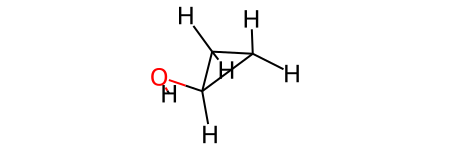

In [8]:
m2_h = Chem.MolFromMolBlock(molblock2,removeHs=False)
m2_h

#### RDKit: substructure queries using SMARTS

This notebook explores using `RDKit` to find matching 2D structures in organic molecules, using SMARTS queries.  It uses RDKit's very nice structure renderer to show matches.  This notebook isn't a replacment for the [rdkit documentation](http://www.rdkit.org/docs/), but is intended to complement it.

In [9]:
from __future__ import print_function
# import rdkit components
from rdkit import rdBase
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# use IPythonConsole for pretty drawings
from rdkit.Chem.Draw import IPythonConsole

## The next line is commented out 
### because GitHub does not render svg's embedded in notebooks
# IPythonConsole.ipython_useSVG=True

#### Defining and viewing a small set of example molecules

In [10]:
# some heterocycles 
naphthalene = Chem.MolFromSmiles('c12ccccc1cccc2')
benzoxazole = Chem.MolFromSmiles('n1c2ccccc2oc1')
indane = Chem.MolFromSmiles('c1ccc2c(c1)CCC2')
skatole = Chem.MolFromSmiles('CC1=CNC2=CC=CC=C12')
benzene = Chem.MolFromSmiles('c1ccccc1')
quinoline = Chem.MolFromSmiles('n1cccc2ccccc12')

my_molecules = [naphthalene, 
                benzoxazole,
                indane,
                skatole,
                benzene,
                quinoline,
               ]

Our test molecules for this notebook will be the arbitrary set of heterocycles and homocycles (and benzene) above.  

It's easy to get a look at the structure of these molecules.

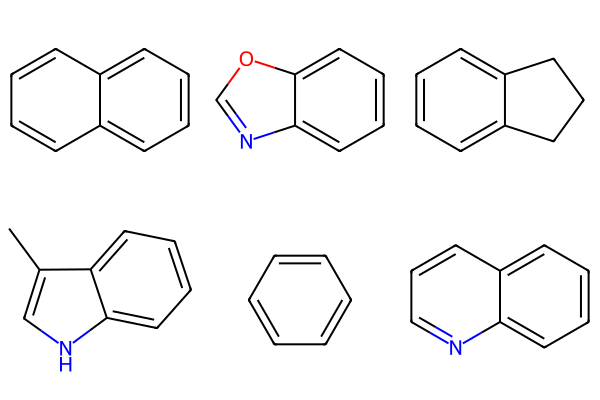

In [11]:
Draw.MolsToGridImage(my_molecules, useSVG=False)

For `RDKit` molecules created via SMILES, ring properties are instantiated automatically on molecule creation.  Thus, the code below that tests whether any atom in each molecule is a member of exactly two SSSR rings works right off the bat.  As expected, all molecules have (at least one atom that is in) two rings, except for the fifth molecule, benzene.

In [12]:
is_in_two_rings = Chem.MolFromSmarts('[R2]')
[mol.HasSubstructMatch(is_in_two_rings) for mol in my_molecules]

[True, True, True, True, False, True]

#### Defining substructure queries

[SMARTS](http://www.daylight.com/dayhtml/doc/theory/theory.smarts.html) is a chemical structure query language.  RDKit can import SMARTS queries for use in searching against sets of existing RDKit molecules. [Here's a link](https://rdkit.org/docs/RDKit_Book.html#smarts-support-and-extensions) to the documentation about the RDKit's SMARTS support and the extensions it includes.

In [13]:
# SMARTS query for any five-membered ring fused to a benzene ring
benzo_five = Chem.MolFromSmarts('[*r5R1]1[cR2]2[cR1][cR1][cR1][cR1][cR2]2[*r5R1][*r5R1]1')

In [14]:
# SMARTS query for any six-membered ring fused to a benzene ring
benzo_six = Chem.MolFromSmarts('[*r6R1]1[cR2]2[cR1][cR1][cR1][cR1][cR2]2[*r6R1][*r6R1][*r6R1]1')

In [15]:
smarts_queries = [benzo_five, benzo_six]

Using SMARTS instead of SMILES to initialize molecules does not result in instantiation of a molecule's RingInfo property.  Thus, until `Chem.GetSSSR()` is invoked on a SMARTS-derived molecule, certain queries will fail.

In [16]:
# initialize rings
[Chem.GetSSSR(mol) for mol in smarts_queries]

# now it works
try:
    print([mol.HasSubstructMatch(is_in_two_rings) for mol in smarts_queries])
    print('Success!  Your query worked.\n')
except RuntimeError as err:
    print('ERROR; {0} because RingInfo wasn\'t initialized'.format(err))

[True, True]
Success!  Your query worked.


Now that our query molecules' `RingInfo` is instantiated, it will be possible to compute meaningful 2D sets of coordinates for the SMARTS molecule and to both (a) query against the SMARTS molecule and (b) use the SMARTS molecule as a query against other molecules.  Without calling `Chem.GetSSSR()`, only the second option would be viable.

In [17]:
[AllChem.Compute2DCoords(mol) for mol in smarts_queries]

[0, 0]

In [18]:
# matching the first query
for mol in my_molecules:
    AllChem.GenerateDepictionMatching2DStructure(mol, benzo_five, acceptFailure = True)

#### Showing the hits: five-membered rings fused to benzene

Our matching to our first query is done, and now all we have to do is draw the results.

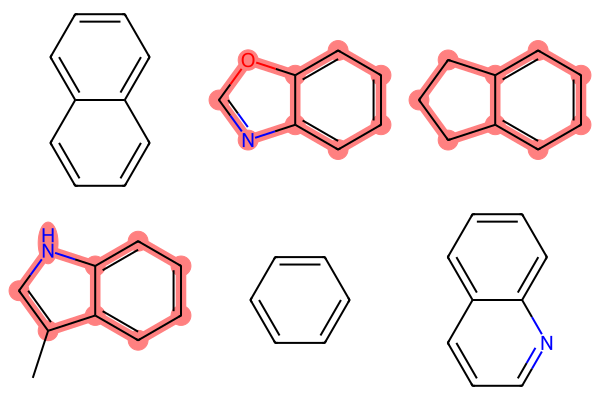

In [19]:
highlight_lists = [mol.GetSubstructMatch(benzo_five) for mol in my_molecules]
Draw.MolsToGridImage(my_molecules, 
                     highlightAtomLists = highlight_lists,
                     useSVG=False
                    )

#### RDKit pandas support
This is a quick tutorial will show some of the ways you can use RDKit together with pandas.

In [20]:
from __future__ import print_function
%matplotlib inline

In [21]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole

# The next line is commented out 
# because GitHub does not render svg's embedded in notebooks
IPythonConsole.ipython_useSVG=False

Load the table of drugs (downloaded from [ChEMBL](https://www.ebi.ac.uk/chembl/) )

This table of drugs contains approximatelly ~15k drugs in different phases of clinical trials.
The information includes:
- Chembl ID
- Name
- Synonyms (associated with the drug)
- Phase (clinical trial phase)
- if Passes the Rule of Five (Ro5)
- and the structure in SMILES format


In [ ]:
if 'google.colab' in str(get_ipython()):
  print('Running on colab')
  !wget https://raw.githubusercontent.com/yerkoescalona/structural_bioinformatics/main/ex04/chembl_drugs.txt.gz
else:
  print('Not running on colab.')
  print('You should have chembl_drugs.txt.gz in your path!')

In [22]:
df = pd.read_csv('chembl_drugs.txt.gz', sep=';')
df.head()

,Parent Molecule,Name,Synonyms,Research Codes,Phase,Drug Applicants,USAN Stem,USAN Year,USAN Definition,USAN Stem - Substem,...,Passes Rule of Five,First In Class,Chirality,Prodrug,Oral,Parenteral,Topical,Black Box,Availability Type,Smiles
0,CHEMBL492491,FENVALERATE,BELMARK|FENVALERATE|PHENVALERATE|PYDRIN|S-5602...,S-5602|SD-43775|WL-43775,-1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,Racemic Mixture,0,0,0,0,0,Unknown,CC(C)C(C(=O)OC(C#N)c1cccc(Oc2ccccc2)c1)c1ccc(C...
1,CHEMBL2103777,THIOPHANATE,NSC-170810|THIOPHANATE,NSC-170810,-1.0,NaN,NaN,NaN,NaN,NaN,...,1,0,Achiral Molecule,0,0,0,0,0,Unknown,CCOC(=O)NC(=S)Nc1ccccc1NC(=S)NC(=O)OCC
2,CHEMBL1868702,GESTRINONE,A 46 745|A-46-745|A-46745|DIMETRIOSE|GESTRINON...,A 46 745|A-46-745|A-46745|R 2323|R-2323|RU 232...,4.0,NaN,'-estr-; -rinone',1978.0,estrogens; cardiotonics (amrinone type),'-estr-(-estr-); -rinone(-rinone)',...,1,0,Single Stereoisomer,0,0,0,0,0,Unknown,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3C=...
3,CHEMBL2104213,DESMENINOL,DESMENINOL|METHIONINE HYDROXY ANALOG,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,...,1,0,Racemic Mixture,0,0,0,0,0,Unknown,CSCCC(O)C(=O)O
4,CHEMBL1904952,QUAZODINE,MJ 1988|MJ-1988|QUAZODINE,MJ 1988|MJ-1988,-1.0,NaN,NaN,1968.0,NaN,NaN,...,1,0,Achiral Molecule,0,0,0,0,0,Unknown,CCc1ncnc2cc(OC)c(OC)cc12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14800,CHEMBL563,FLURBIPROFEN,"Ansaid|BTS 18,322|BTS-18322|CEBUTID|FLUBIPROFE...","BTS 18,322|BTS-18322|NSC-757037|U-27,182|U-27182",4.0,Ivax Pharmaceuticals Inc Sub Teva Pharmaceutic...,'-profen',1976.0,anti-inflammatory/analgesic agents (ibuprofen ...,'-profen(-profen)',...,1,0,Racemic Mixture,0,1,0,1,1,Prescription Only,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1
14801,CHEMBL1115,PYRIDOSTIGMINE,Mestinon|PYRIDOSTIGMINE|PYRIDOSTIGMINE CATION|...,NaN,4.0,Ani Pharmaceuticals Inc|Impax Laboratories Inc...,'-stigmine',NaN,cholinesterase inhibitors (physostigmine type),'-stigmine(-stigmine)',...,1,0,Achiral Molecule,0,1,1,0,1,Prescription Only,CN(C)C(=O)Oc1ccc[n+](C)c1
14802,CHEMBL8809,RACLOPRIDE,RACLOPRIDE,NaN,1.0,NaN,'-pride',1997.0,sulpride derivatives and analogs,'-pride(-pride)',...,1,0,Single Stereoisomer,0,0,0,0,0,Unknown,CCN1CCC[C@H]1CNC(=O)c1c(O)c(Cl)cc(Cl)c1OC
14803,CHEMBL30044,DIBROMPROPAMIDINE,DIBROMOPROPAMIDINE|DIBROMPROPAMIDINE,NaN,-1.0,NaN,'-amidine',NaN,pentamidine derivatives/analogues,'-amidine(-amidine)',...,1,0,Achiral Molecule,0,0,0,0,0,Unknown,N=C(N)c1ccc(OCCCOc2ccc(C(=N)N)cc2Br)c(Br)c1


In [23]:
df[df['Name'] == 'RALOXIFENE']

,Parent Molecule,Name,Synonyms,Research Codes,Phase,Drug Applicants,USAN Stem,USAN Year,USAN Definition,USAN Stem - Substem,...,Passes Rule of Five,First In Class,Chirality,Prodrug,Oral,Parenteral,Topical,Black Box,Availability Type,Smiles
7501,CHEMBL81,RALOXIFENE,EVIDEN|Evista|J22.982B|KEOXIFENE|LY-139481|NSC...,J22.982B|LY-139481|NSC-747974,4.0,Sciegen Pharmaceuticals Inc|Glenmark Pharmaceu...,'-ifene',1988.0,antiestrogens of the clomifene and tamoxifen g...,'-ifene(-ifene)',...,0,0,Achiral Molecule,0,1,0,0,1,Prescription Only,O=C(c1ccc(OCCN2CCCCC2)cc1)c1c(-c2ccc(O)cc2)sc2...


In [24]:
df.columns

Index(['Parent Molecule', 'Name', 'Synonyms', 'Research Codes', 'Phase',
       'Drug Applicants', 'USAN Stem', 'USAN Year', 'USAN Definition',
       'USAN Stem - Substem', 'First Approval', 'ATC Codes',
       'Level 4 ATC Codes', 'Level 3 ATC Codes', 'Level 2 ATC Codes',
       'Level 1 ATC Codes', 'Indication Class', 'Patent', 'Drug Type',
       'Passes Rule of Five', 'First In Class', 'Chirality', 'Prodrug', 'Oral',
       'Parenteral', 'Topical', 'Black Box', 'Availability Type', 'Smiles'],
      dtype='object')

In [25]:
len(df)

14805

In [26]:
df = df[df['Smiles'].notnull() & # Keep cpds with SMILES
        (df['Phase'] == 4)] # are on the market
df.head()

,Parent Molecule,Name,Synonyms,Research Codes,Phase,Drug Applicants,USAN Stem,USAN Year,USAN Definition,USAN Stem - Substem,...,Passes Rule of Five,First In Class,Chirality,Prodrug,Oral,Parenteral,Topical,Black Box,Availability Type,Smiles
2,CHEMBL1868702,GESTRINONE,A 46 745|A-46-745|A-46745|DIMETRIOSE|GESTRINON...,A 46 745|A-46-745|A-46745|R 2323|R-2323|RU 232...,4.0,NaN,'-estr-; -rinone',1978.0,estrogens; cardiotonics (amrinone type),'-estr-(-estr-); -rinone(-rinone)',...,1,0,Single Stereoisomer,0,0,0,0,0,Unknown,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3C=...
156,CHEMBL3707281,MAGNESIUM LACTATE,"ANHYDROUS MAGNESIUM LACTATE, DL-|DL-LACTIC ACI...",NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,0,0,Unknown,0,0,0,0,0,Unknown,CC(O)C(=O)[O-].CC(O)C(=O)[O-].[Mg+2]
170,CHEMBL3833409,HYDROTALCITE,HYDROTALCITE,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,0,0,Achiral Molecule,0,0,0,0,0,Unknown,O=C([O-])[O-].[Al+3].[Al+3].[Mg+2].[Mg+2].[Mg+...
182,CHEMBL307145,PYROGALLOL,NSC-5035|PYROGALLIC ACID|PYROGALLOL,NSC-5035,4.0,NaN,NaN,NaN,NaN,NaN,...,1,0,Achiral Molecule,0,0,0,0,0,Unknown,Oc1cccc(O)c1O
373,CHEMBL2107004,QUINESTRADOL,COLPOVIS|PENTOVIS|QUINESTRADIOL|QUINESTRADOL,NaN,4.0,NaN,'-adol; -estr-',NaN,analgesics (mixed opiate receptor agonists/ant...,'-adol(-adol); -estr-(-estr-)',...,1,0,Single Stereoisomer,0,0,0,0,0,Unknown,C[C@]12CC[C@@H]3c4ccc(OC5CCCC5)cc4CC[C@H]3[C@@...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14797,CHEMBL360328,LORCASERIN,LORCASERIN,NaN,4.0,Eisai Inc,'-caserin',2005.0,"serotonin receptor agonists, primarily 5-HT2",'-caserin(-caserin)',...,1,1,Single Stereoisomer,0,1,0,0,0,Withdrawn,C[C@H]1CNCCc2ccc(Cl)cc21
14799,CHEMBL1237,LISINOPRIL,LISINOPRIL|MK-521|NSC-751176|NSC-758151|Priniv...,MK-521|NSC-751176|NSC-758151,4.0,Watson Labs Inc|Heritage Pharma Labs Inc|Atlan...,'-pril',1984.0,antihypertensives (ACE inhibitors),'-pril(-pril)',...,1,0,Single Stereoisomer,0,1,0,0,1,Prescription Only,NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...
14800,CHEMBL563,FLURBIPROFEN,"Ansaid|BTS 18,322|BTS-18322|CEBUTID|FLUBIPROFE...","BTS 18,322|BTS-18322|NSC-757037|U-27,182|U-27182",4.0,Ivax Pharmaceuticals Inc Sub Teva Pharmaceutic...,'-profen',1976.0,anti-inflammatory/analgesic agents (ibuprofen ...,'-profen(-profen)',...,1,0,Racemic Mixture,0,1,0,1,1,Prescription Only,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1
14801,CHEMBL1115,PYRIDOSTIGMINE,Mestinon|PYRIDOSTIGMINE|PYRIDOSTIGMINE CATION|...,NaN,4.0,Ani Pharmaceuticals Inc|Impax Laboratories Inc...,'-stigmine',NaN,cholinesterase inhibitors (physostigmine type),'-stigmine(-stigmine)',...,1,0,Achiral Molecule,0,1,1,0,1,Prescription Only,CN(C)C(=O)Oc1ccc[n+](C)c1


Table contains CANONICAL_SMILES with SMILES which we can convert to RDKit molecules (default name ROMol)

In [27]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='Smiles')

[08:37:34] WARNING: not removing hydrogen atom without neighbors
[08:37:34] WARNING: not removing hydrogen atom without neighbors
[08:37:34] WARNING: not removing hydrogen atom without neighbors
[08:37:34] WARNING: not removing hydrogen atom without neighbors
/home/yescalona/anaconda3/envs/structbioinfo/lib/python3.10/site-packages/rdkit/Chem/PandasTools.py:371: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


Remove rows where RDKit failed to generate a molecule from SMILES

In [28]:
df = df[~df['ROMol'].isnull()]

Extract a name from SYNONYMS column by applying a row-wise operation

In [29]:
df['name'] = df.apply(lambda x: x['Synonyms'].split('|')[0] if type(x['Synonyms']) is str else None, axis=1)

Depict first 12 mols

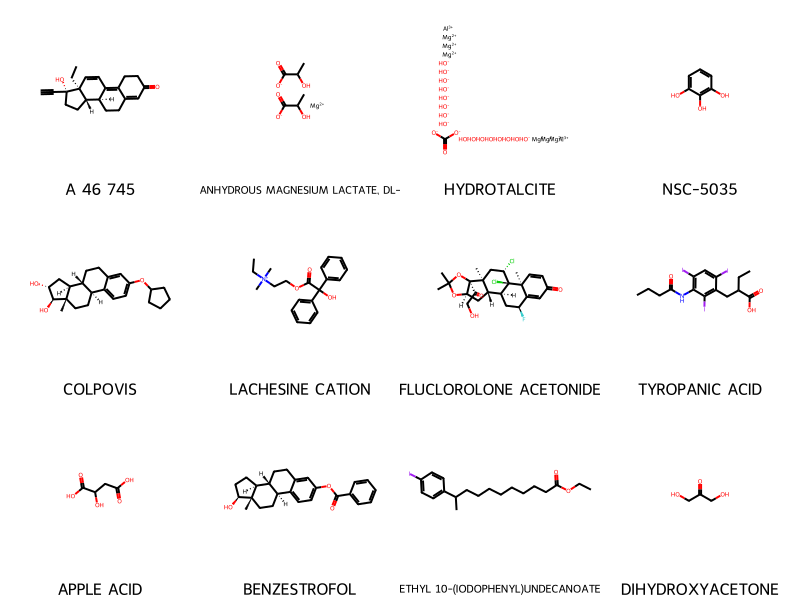

In [30]:
PandasTools.FrameToGridImage(df.head(12), legendsCol='name', molsPerRow=4)

Calculate some descriptors and visualize distributions

In [31]:
from rdkit.Chem import Descriptors

In [32]:
df['MW'] = df['ROMol'].map(Descriptors.MolWt)
df['logP'] = df['ROMol'].map(Descriptors.MolLogP)

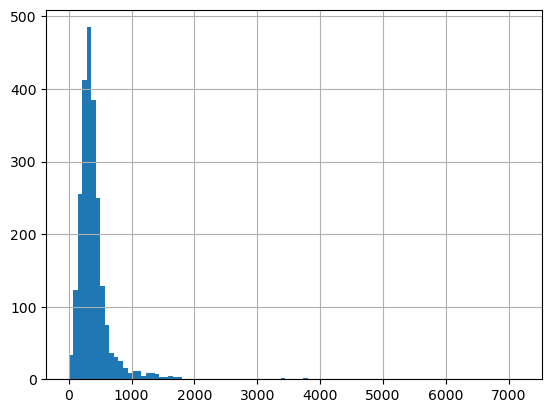

In [33]:
df['MW'].hist(bins=100);

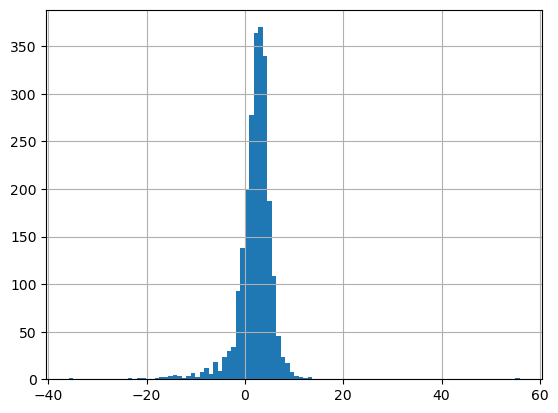

In [34]:
df['logP'].hist(bins=100);

In [35]:
df[['MW', 'logP']].describe()

,MW,logP
count,2353.000000,2353.000000
mean,410.152942,2.114375
std,385.841092,3.613511
min,4.003000,-35.810900
25%,254.246000,0.821600
50%,340.507000,2.562000
75%,450.707000,4.002000
max,7177.248000,55.892400


Do a substructure search on a dataframe

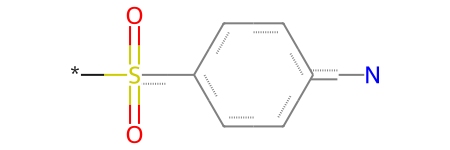

In [36]:
query = Chem.MolFromSmarts('Nc1ccc(S(=O)(=O)-[*])cc1')
query

Notice that unspecified bonds in the SMARTS are "single or aromatic" queries. We could make this query a bit more specific:

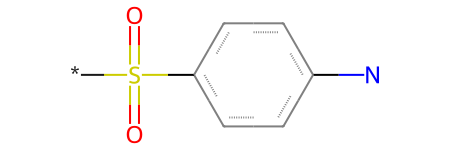

In [37]:
query = Chem.MolFromSmarts('N-c1ccc(-S(=O)(=O)-[*])cc1')
query

We do a substruture search by using the operator `>=` on a molecule column.

Here's an example where we do the search and count the number of matching rows:

In [38]:
len(df[df['ROMol'] >= query])

47

RDKit by defaults highlights the matched substructures

In [39]:
df[df['ROMol'] >= query][['Synonyms', 'ROMol']].head()

,Synonyms,ROMol
3504,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f226076b840>
5591,NSC-66454|NSC-683525|PHTHALYLSULFATHIAZOLE|PHT...,<rdkit.Chem.rdchem.Mol object at 0x7f2261d90e40>
5622,EUVERNIL|N-SULFANILYLCARBAMIDE|NSC-78438|SULFA...,<rdkit.Chem.rdchem.Mol object at 0x7f2261d91230>
5796,GPPE SUSP FTE|GUANIMYCIN|NSC-14041|SULFAGUANID...,<rdkit.Chem.rdchem.Mol object at 0x7f2261d91d90>
6384,ANILINE-P-SULFONIC AMIDE|NSC-7618|P-AMINOBENZE...,<rdkit.Chem.rdchem.Mol object at 0x7f2261d926c0>


Just display the matching molecules:

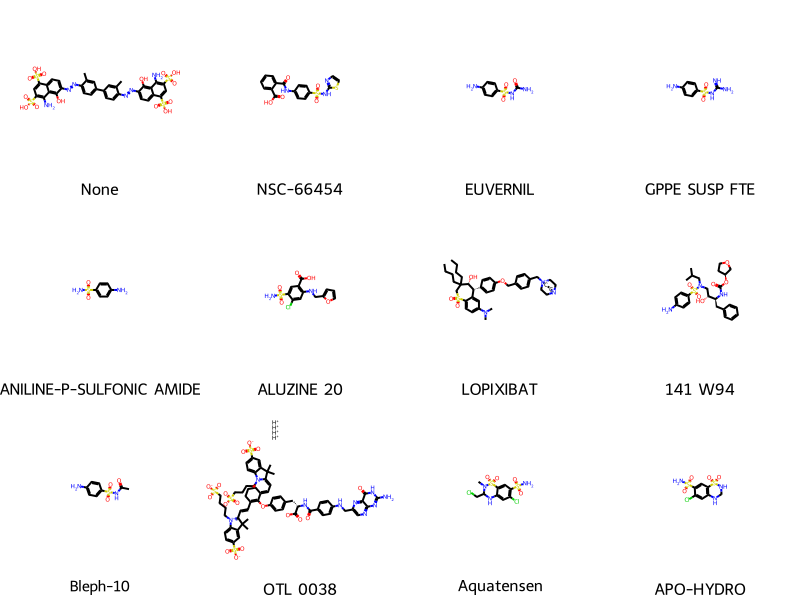

In [40]:
PandasTools.FrameToGridImage(df[df['ROMol'] >= query].head(12), legendsCol='name', molsPerRow=4)

Save the table as SD file

In [41]:
PandasTools.WriteSDF(df, 'approved_drugs.sdf', idName='Parent Molecule', properties=df.columns)

RDKit Exercise:

1. Create new subset of the dataframe with the following properties:
- Use the file `new_chembl_drugs.txt.gz` as input

```python
new_df = pd.read_csv('new_chembl_drugs.txt.gz', sep=';')
```

- Make a selection of molecules that pass the Rule of Five (Rule of Five == 1)
- Make a selection of molecules that are in at least Phase 3 (Phase >= 3)
- Make a selection of all molecules that contain a benzene ring
- Save the subset as a SDF file with the name `new_approved_drugs.sdf`

2. With your new subset of molecules:
- Describe the distribution of the molecular weight and logP. 
- Explain the difference between the distributions with the previous results.


## Autodock Vina

[AutoDock Vina](https://vina.scripps.edu/) is a popular docking program within the AutoDock Suite due to its ease of use, speed, and open-source nature. It is widely used and has been modified by research groups worldwide.


### LABODOCK

In order to use Autodock Vina, we will use [LABODOCK](https://github.com/RyanZR/labodock).
LABODOCK is a collection of Colab Notebooks that provides a simple web interface for Docking.

**Open** the [Basic Molecular Docking](https://colab.research.google.com/github/RyanZR/labodock/blob/main/notebooks/basic_molecular_docking.ipynb) Notebook and follow the instructions. We will execute the default example.

### Default Example: ERα Ligand Binding Domain in complex with Raloxifene 

The default tutorial uses the protein with PDB ID [7KBS](https://www.rcsb.org/structure/7KBS).
This is a Estrogen Receptor Alpha (ERα) Ligand Binding Domain in complex with Raloxifene (See in [more details](https://www.rcsb.org/3d-view/7KBS?preset=ligandInteraction&label_asym_id=C)).

Context: When estrogen binds to the Estrogen Receptor Alpha (ERα), the receptor undergoes a conformational change, which allows it to bind to specific DNA sequences called estrogen response elements (EREs). The genes activated or repressed by this complex can lead to various cellular responses. For instance, in breast tissue, estrogen-ERα interaction can stimulate cell division and growth, which is a normal process but can also contribute to the development and progression of breast cancer in estrogen-receptor-positive tumors. 

Solution: Raloxifene is used as therapy.  When Raloxifene binds to the LBD of ERα, it induces a specific conformational change in the receptor. This change differs from the conformation induced by estrogen binding, which is critical for the drug's mechanism of action. Raloxifene acts as an antagonist in breast tissue, meaning it blocks the activity of estrogen.

![villin](./protein-ligand.png)
**Figure**. ERα Ligand Binding Domain in complex with Raloxifene 


### Docking Exercises:

1. Describe all the interactions between the ligand and the protein.
2. Use estrogen as a ligand instead of Raloxifene. What are the differences in the interactions between the ligand and the protein?
3. Using those difference, could you be able to predict the conformational change of the protein when binding to Raloxifene or estrogen?

# For the Project

If your proteins can potentially interact with a ligand you can use the following workflow:
1. Find the Smiles format of the ligand in the ChEMBL database.
2. Use your PDB id and ligand Smiles format for the docking.
3. Describe the interactions between the ligand and the protein.

If your protein doesn't have a ligand, you can use the following workflow:
1. Use one of the following molecules as a ligand to your protein:

- Formaldehyde or Acetaldehyde: These small aldehyde molecules can be used to show how different functional groups (like the aldehyde group) interact with proteins. They can illustrate polar interactions and the role of hydrogen bonding in docking.

- Glycerol: This molecule, with its three hydroxyl groups, can demonstrate polyol interactions with proteins. It's particularly relevant for showing hydrogen bonding and the effect of multiple binding sites.

- Acetic Acid or Propionic Acid: These small carboxylic acids can be used to discuss the importance of charge in protein-ligand interactions, showing how deprotonation and protonation states affect docking.

- Benzene or Toluene: These aromatic compounds can illustrate hydrophobic interactions and pi-stacking, which are important in the docking of many drugs and natural ligands.

- Nitrate or Phosphate Ions: As small inorganic ions, they can be used to teach about ionic interactions and the role of electrostatics in protein-ligand docking.

- Urea or Thiourea: These molecules can be used to show how amide and thiol groups interact with proteins, and they're particularly interesting for discussing solvation effects and hydrogen bonding.

2. Use your PDB id and ligand Smiles format for the docking.
3. Describe the interactions between the ligand and the protein.
